In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

## Plot Function

In [82]:
def plot(values, policy, goalState, flag):
    cmap = plt.cm.gray
    norm = plt.Normalize(np.min(values), np.max(values))
    rgba = cmap(norm(values))

    fig, ax = plt.subplots()
    im = ax.imshow(rgba, interpolation = 'nearest')
    ax.set_ylim(ax.get_ylim()[::-1])
    print(np.min(values), np.max(values))

    if(flag):
        for i in range(0, 25):
            for j in range(0, 50):
                #print('policy for ', i, j, policy[i][j])
                if(not isValid(j, i)): continue

                num = int(policy[i][j])
                text = ''
                if(num == 1): text = 'L'
                elif(num == 2): text = 'U'
                elif(num == 3): text = 'R'
                else: text = 'D'
                text = ax.text(j, i, text, ha = 'center', va = 'center', color = 'red', size = 'xx-small')

    rgba[12, 48] = 1.0, 0.0, 0.0, 1.0
    plt.axis('on')
    plt.show()

## Part a - Value Iteration 
#### &#8594; Intial values for all possible states is 0
#### &#8594; Action 1 means left, Action 2 means up, Aciton 3 means right, Action 4 means down

#### This function determines if the state is valid or a wall

In [3]:
def isValid(i, j):
    if(i == 0 or j == 0 or i == 49 or j == 24): return False
    if(i == 25 or i == 26):
        if(j <= 11 or j >= 13): return False
    return True

#### This function gets the reward given a state and an action 

In [4]:
def reward(i, j, action, values, goalState, gamma, step):

    ans = 0

    if(action == 1):
        ans += 0.8 * rewardHelper(i - 1, j, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i , j + 1, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i + 1, j, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i , j - 1, values, gamma, step, goalState, i, j)
    if(action == 2):
        ans += (0.2 / 3) * rewardHelper(i - 1, j, values, gamma, step, goalState, i, j)
        ans += 0.8 * rewardHelper(i , j + 1, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i + 1, j, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i , j - 1, values, gamma, step, goalState, i, j)
    if(action == 3):
        ans += (0.2 / 3) * rewardHelper(i - 1, j, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i , j + 1, values, gamma, step, goalState, i, j)
        ans += 0.8 * rewardHelper(i + 1, j, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i , j - 1, values, gamma, step, goalState, i, j)
    if(action == 4):
        ans += (0.2 / 3) * rewardHelper(i - 1, j, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i , j + 1, values, gamma, step, goalState, i, j)
        ans += (0.2 / 3) * rewardHelper(i + 1, j, values, gamma, step, goalState, i, j)
        ans += 0.8 * rewardHelper(i , j - 1, values, gamma, step, goalState, i, j)
    return ans


In [5]:
def rewardHelper(i, j, values, gamma, step, goalState, posX, posY):
    x = goalState[0]
    y = goalState[1]
    ans = 0
    if(i == x and j == y):
        ans += 100
    if(not isValid(i, j)): 
        
        if(posX == x and posY == y): 
            ans += 100
            ans += gamma * values[posX][posY][step - 1]
        else:
            ans -= 1
            ans += gamma * values[posX][posY][step - 1]
    
    else: ans += gamma * values[i][j][step - 1]

    return ans

In [56]:
def valueIteration(gamma, theta, goalState, values, policies, maxNorm, toConverge):

    for step in range(1, values.shape[2]):

        change = -1

        for i in range(0, 50):
            for j in range(0, 25):
                #Check if this is a wall or not
                if(not isValid(i, j)): continue #Is a wall
                
                maxValue = -np.Inf
                actionTaken = 0
                #Taking max after considering every action as intended action
                for action in range(1, 5):
                    curr = reward(i, j, action, values, goalState, gamma, step)   # expected reward using this action as the intended action
                    #print('reward for action', action, 'at step', step, 'for state', i, j, 'is', curr)
                    if(curr > maxValue):
                        maxValue = curr
                        actionTaken = action
                        #if(step == 4):
                            #print('changing action for state ', i, j, 'new max value', maxValue, 'new action', actionTaken)
                
                values[i][j][step] = maxValue

                #print('values at step ', step, i, j, maxValue)
                change = max(abs(maxValue - values[i][j][step - 1]), change) #calculate the change

                policies[i][j][step - 1] = actionTaken

        #print('maxNorm at step', step, 'is', change)
        if(change < theta and toConverge): 
            print('converged at step', step, 'max change', change)
            break  # converged
        maxNorm[step - 1] = change
    
    return values, policies

#### Run the function for the values given in the assignment

-0.14116039021347954 88.86018616215178


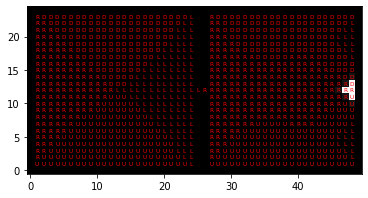

In [83]:
iter = 100 #max iterations if not converging
values = np.zeros((50, 25, iter + 1))
policies = np.zeros((50, 25, iter))
maxNorm = np.zeros((iter))

values, policies = valueIteration(0.1, 0.1, (48, 12), values, policies, maxNorm, False)

mat1 = np.zeros((25, 50))
mat2 = np.zeros((25, 50))

for i in range(0, 50):
    for j in range(0, 25):
        mat1[j][i] = values[i][j][100]
        mat2[j][i] = policies[i][j][99]

plot(mat1, mat2, (48, 12), True)
#for step in range(0, iter + 1):
#    for i in range(0, 50):
#        for j in range(0, 25):
#            print('values at step ', step, i, j, values[i][j][step])
    

#print(values.shape)
#plot(values[:][:][iter], policies[:][:][iter - 1], (48, 12))
#np.set_printoptions(threshold=np.inf)


## Part b - Plot the value function at different iterations

converged at step 662 max change 0.09985530471385573
-0.2697482199367988 1404.8079657819892


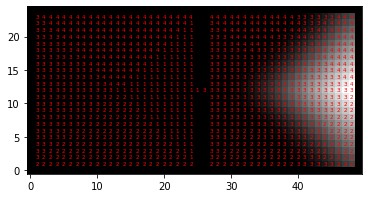

-0.26976312601392816 3036.675989616644


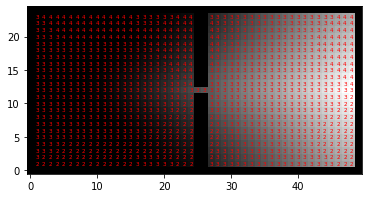

0.0 4868.389999091354


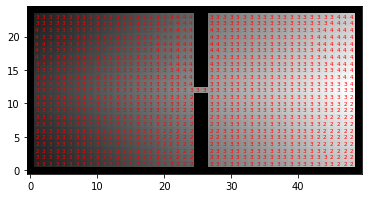

In [78]:
iter = 1000 #max iterations if not converging
valuesNew = np.zeros((50, 25, iter + 1))
policiesNew = np.zeros((50, 25, iter))
maxNormNew = np.zeros((iter))

valuesNew, policiesNew = valueIteration(0.99, 0.1, (48, 12), valuesNew, policiesNew, maxNormNew, True)

reqIteration = np.array([20, 50, 100])

for x in reqIteration:
    mat1 = np.zeros((25, 50))
    mat2 = np.zeros((25, 50))

    for i in range(0, 50):
        for j in range(0, 25):
            mat1[j][i] = valuesNew[i][j][x]
            mat2[j][i] = policiesNew[i][j][x - 1]

    plot(mat1, mat2, (48, 12), True)

## Part c - Sample execution using the policy

#### Function to move the agent based on the intended action

In [40]:
def move(currState, action):
    num = random.uniform(0.0, 1.0)
    newStateX = -5
    newStateY = -5

    if(action == 1):
        if(num <= 0.8): newStateX = currState[0] - 1
        elif(num <= 0.8 + 0.2 / 3): newStateY = currState[1] + 1
        elif(num <= 1.0 - 0.2 / 3): newStateX = currState[0] + 1
        else: newStateY = currState[1] - 1
    if(action == 2):
        if(num <= 0.8): newStateY = currState[1] + 1
        elif(num <= 0.8 + 0.2 / 3): newStateX = currState[0] - 1
        elif(num <= 1.0 - 0.2 / 3): newStateX = currState[0] + 1
        else: newStateY = currState[1] - 1
    if(action == 3):
        if(num <= 0.8): newStateX = currState[0] + 1
        elif(num <= 0.8 + 0.2 / 3): newStateY = currState[1] + 1
        elif(num <= 1.0 - 0.2 / 3): newStateX = currState[0] - 1
        else: newStateY = currState[1] - 1
    if(action == 4):
        if(num <= 0.8): newStateY = currState[1] - 1
        elif(num <= 0.8 + 0.2 / 3): newStateY = currState[1] + 1
        elif(num <= 1.0 - 0.2 / 3): newStateX = currState[0] + 1
        else: newStateX = currState[0] - 1
    
    if(newStateX == -5): newStateX = currState[0]
    if(newStateY == -5): newStateY = currState[1]

    if(not isValid(newStateX, newStateY)): return currState
    else: return (newStateX, newStateY)

#### Move the agent and get the counts for each state visitation

0.0 3.0


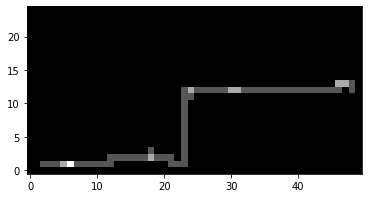

0.0 2.0


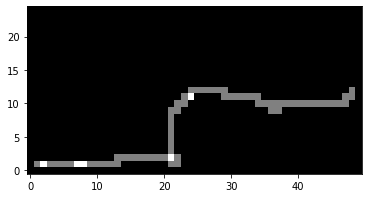

0.0 3.0


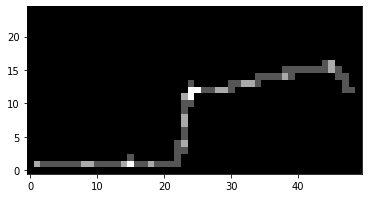

0.0 3.0


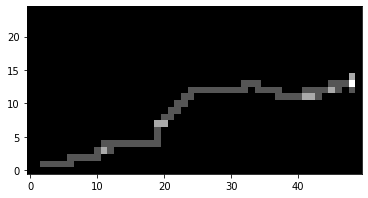

0.0 2.0


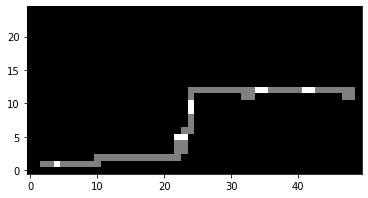

0.0 3.0


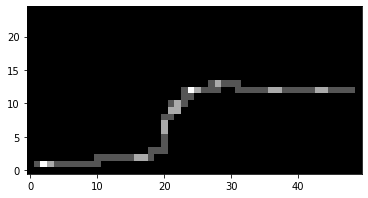

0.0 3.0


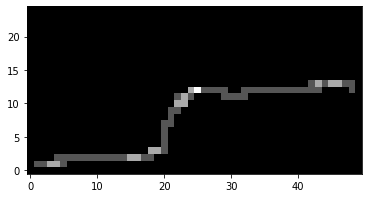

0.0 3.0


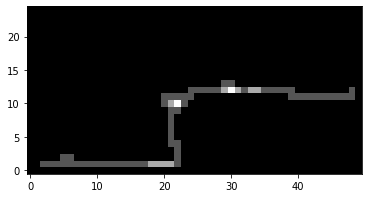

0.0 3.0


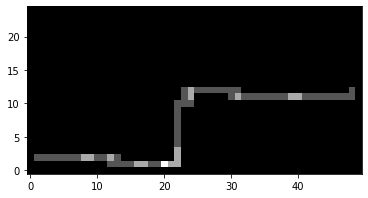

0.0 2.0


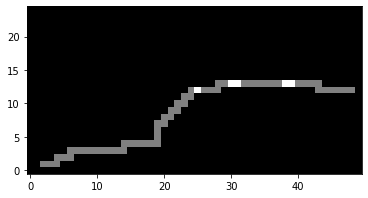

0.0 3.0


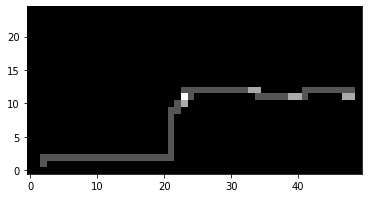

0.0 3.0


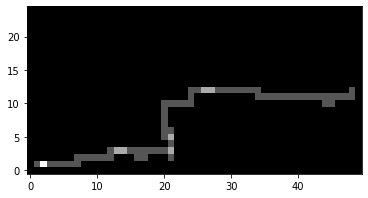

0.0 3.0


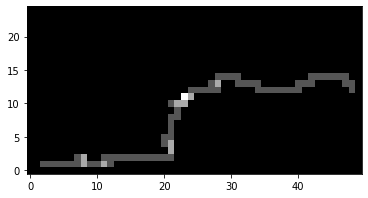

0.0 3.0


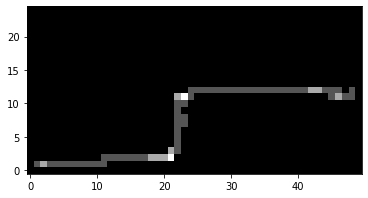

0.0 3.0


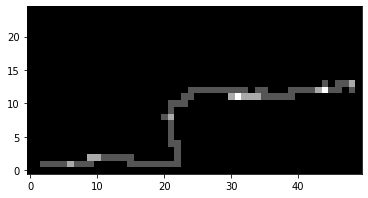

0.0 4.0


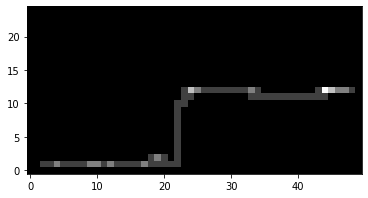

0.0 3.0


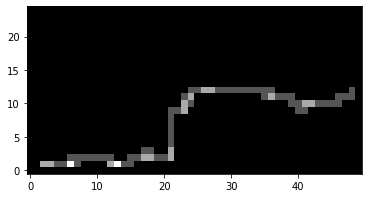

0.0 6.0


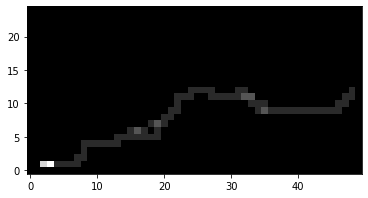

0.0 3.0


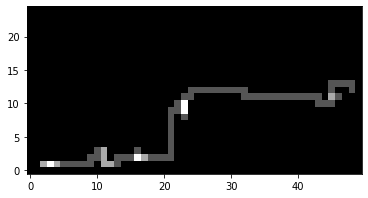

0.0 3.0


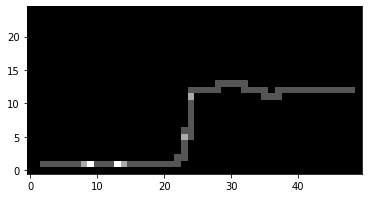

0.0 5.0


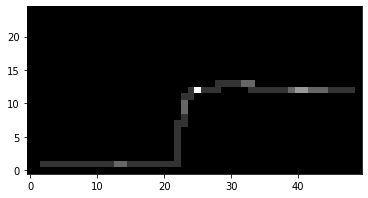

0.0 4.0


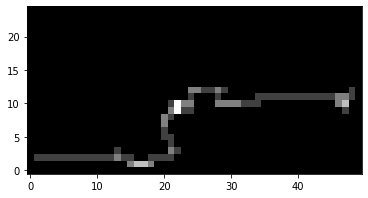

0.0 3.0


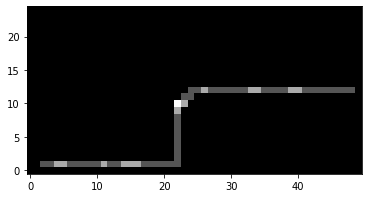

0.0 2.0


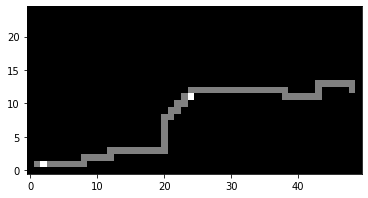

0.0 3.0


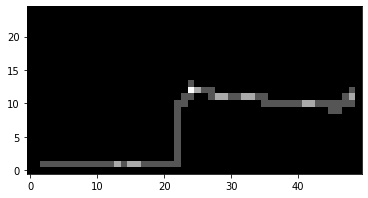

0.0 2.0


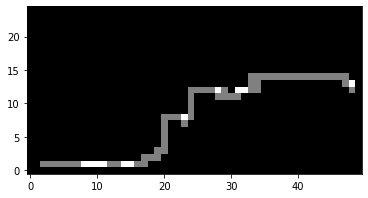

0.0 4.0


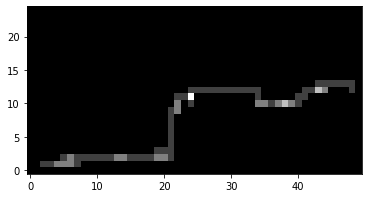

0.0 2.0


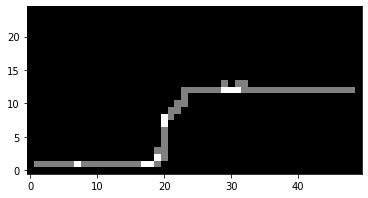

0.0 3.0


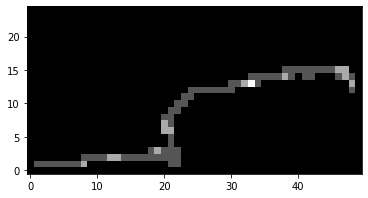

0.0 2.0


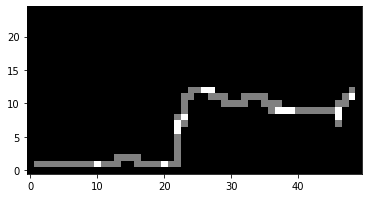

0.0 2.0


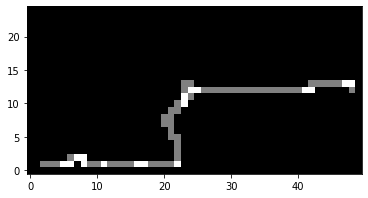

0.0 3.0


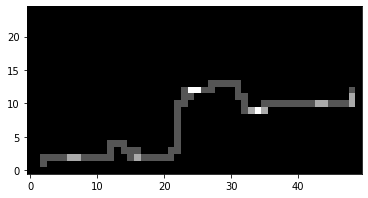

0.0 3.0


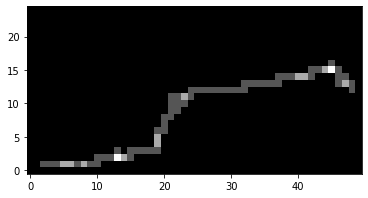

0.0 3.0


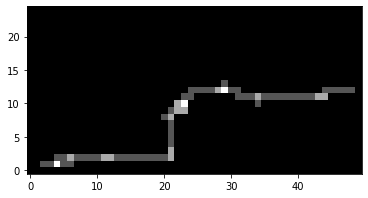

0.0 3.0


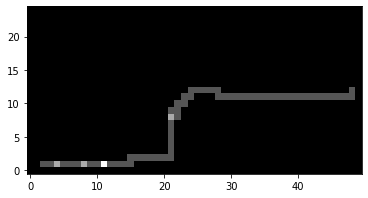

0.0 2.0


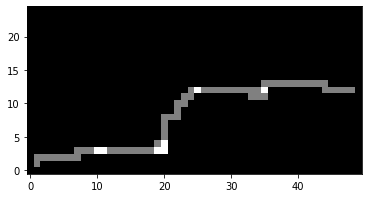

0.0 3.0


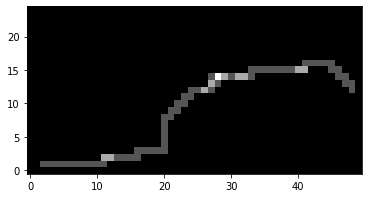

0.0 5.0


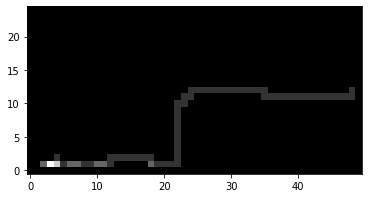

0.0 3.0


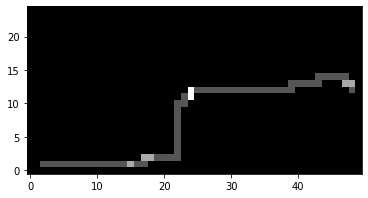

0.0 6.0


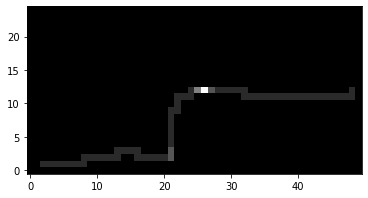

0.0 3.0


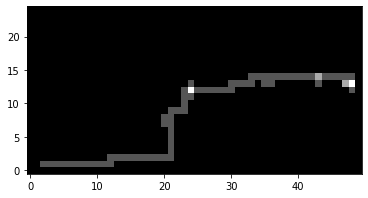

0.0 3.0


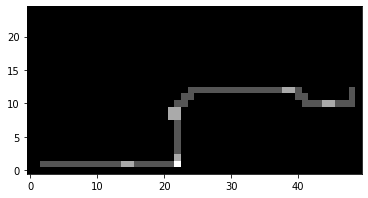

0.0 3.0


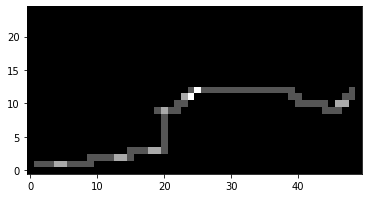

0.0 3.0


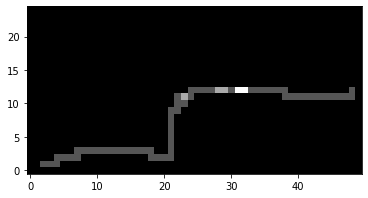

0.0 2.0


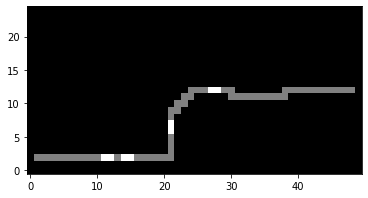

0.0 2.0


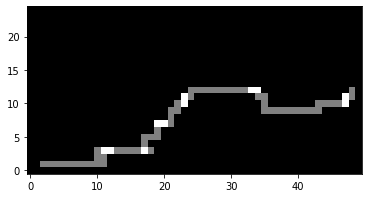

0.0 2.0


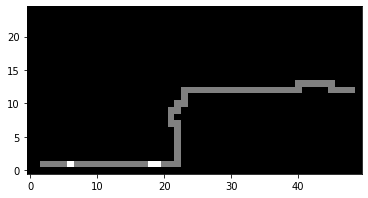

0.0 3.0


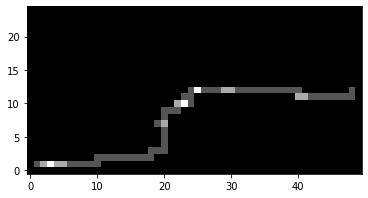

0.0 2.0


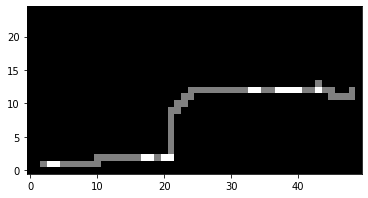

0.0 3.0


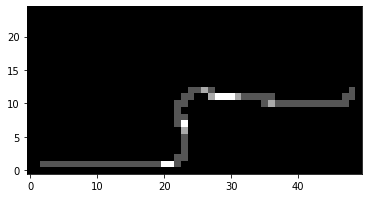

0.0 3.0


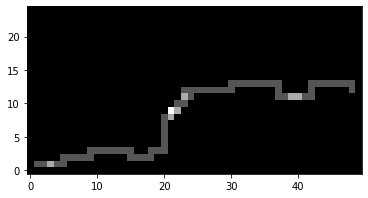

0.0 4.0


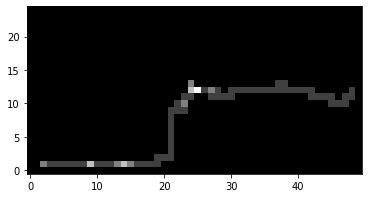

0.0 3.0


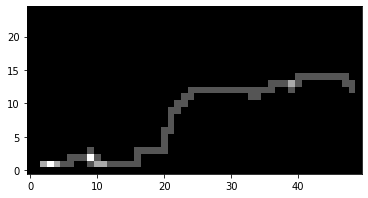

0.0 3.0


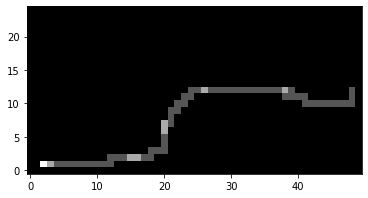

0.0 3.0


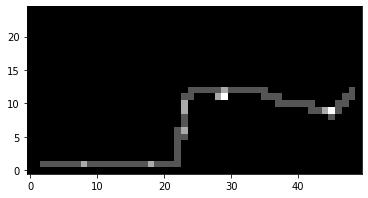

0.0 3.0


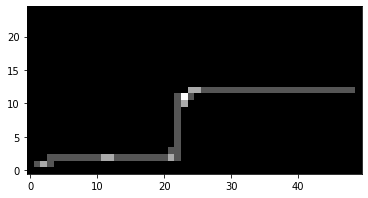

0.0 3.0


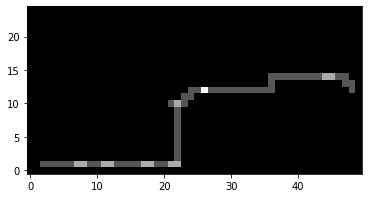

0.0 4.0


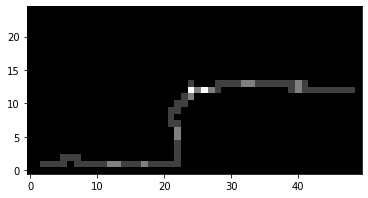

0.0 3.0


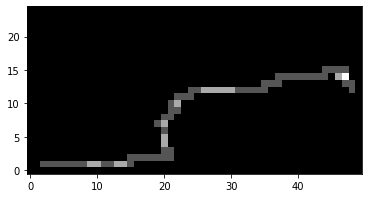

0.0 3.0


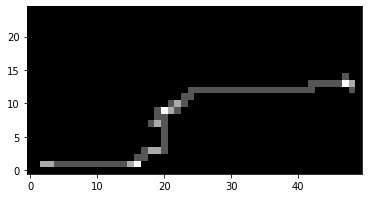

0.0 3.0


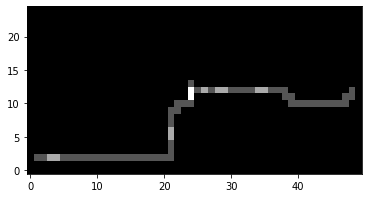

0.0 2.0


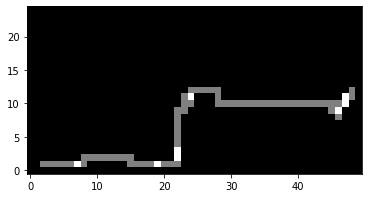

0.0 3.0


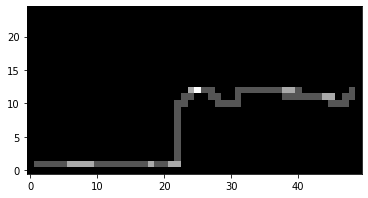

0.0 3.0


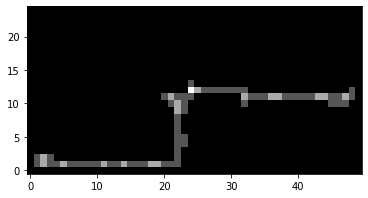

0.0 3.0


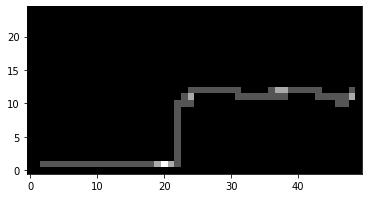

0.0 3.0


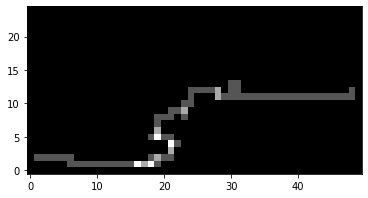

0.0 3.0


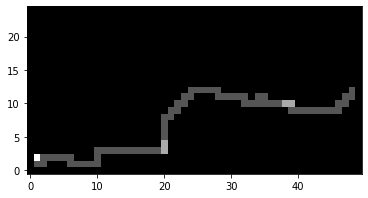

0.0 4.0


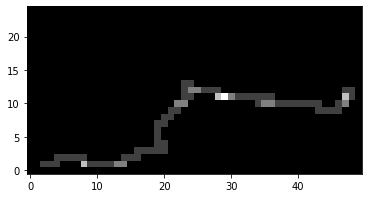

0.0 2.0


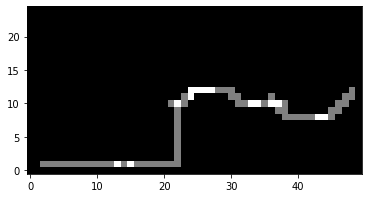

0.0 2.0


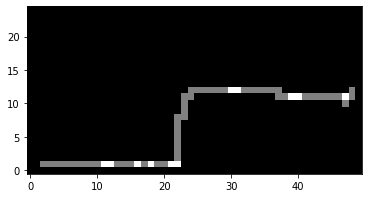

0.0 3.0


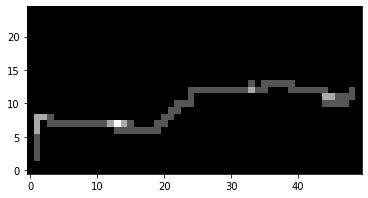

0.0 4.0


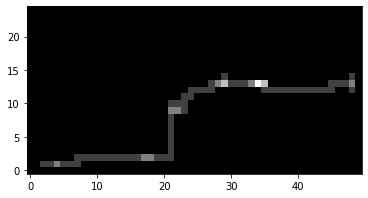

0.0 2.0


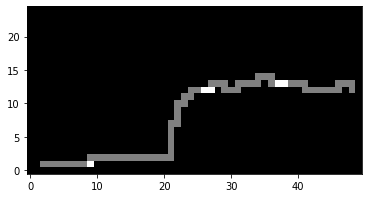

0.0 3.0


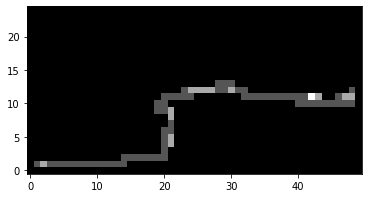

0.0 2.0


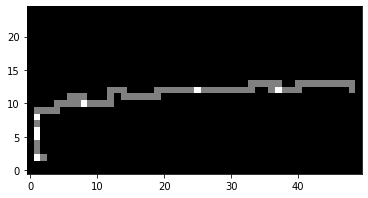

0.0 4.0


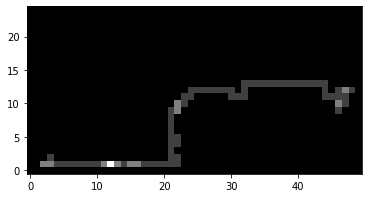

0.0 4.0


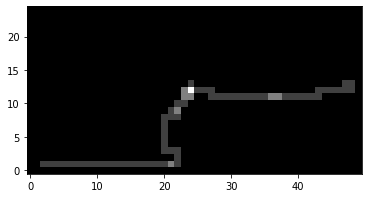

0.0 2.0


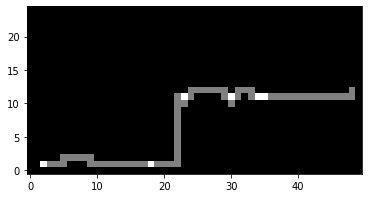

0.0 3.0


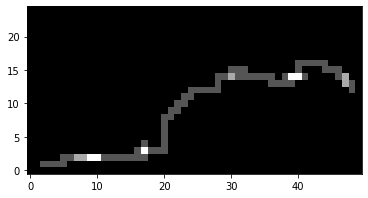

0.0 2.0


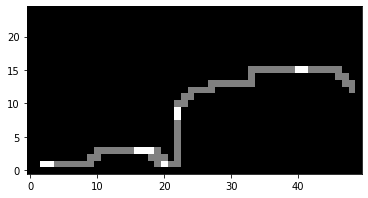

0.0 3.0


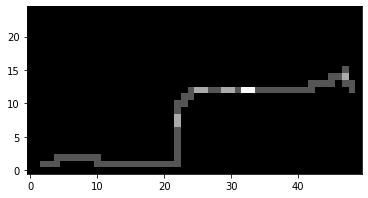

0.0 2.0


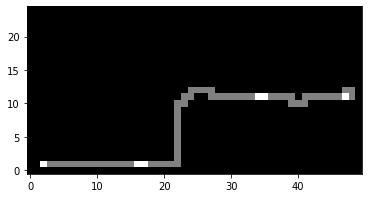

0.0 2.0


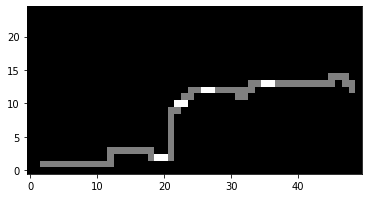

0.0 2.0


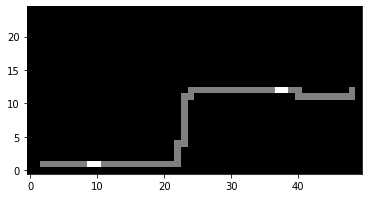

0.0 4.0


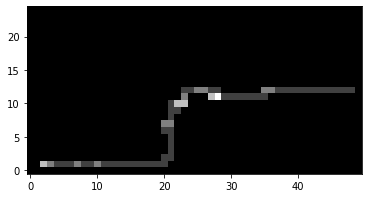

0.0 4.0


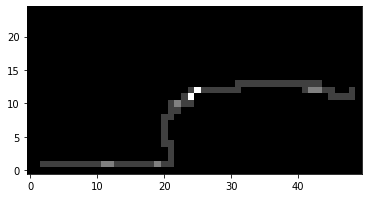

0.0 3.0


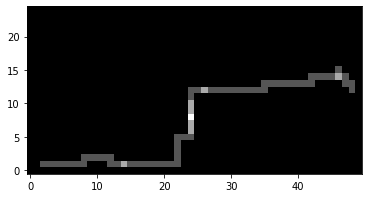

0.0 3.0


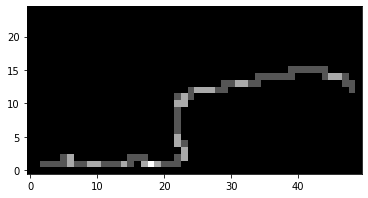

0.0 3.0


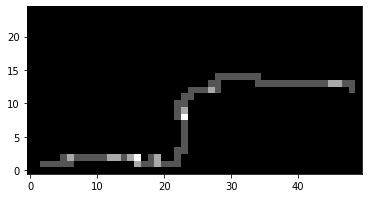

0.0 4.0


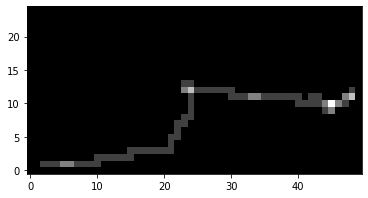

0.0 2.0


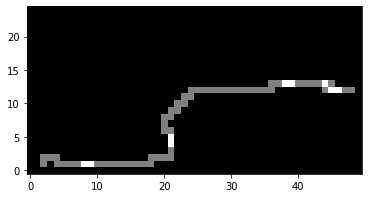

0.0 4.0


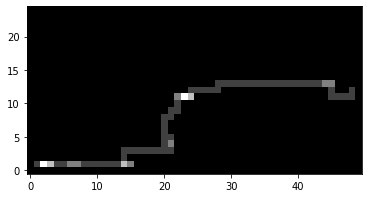

0.0 2.0


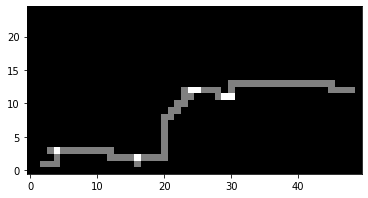

0.0 3.0


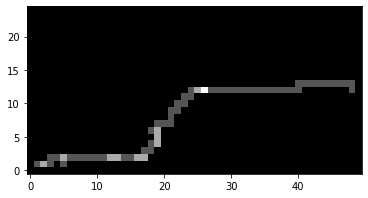

0.0 2.0


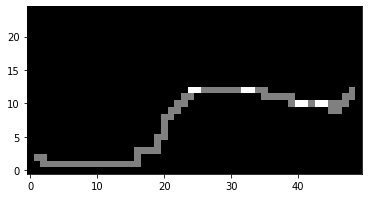

0.0 4.0


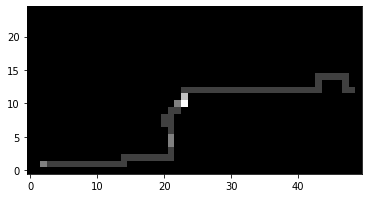

0.0 3.0


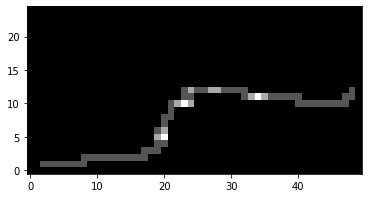

0.0 2.0


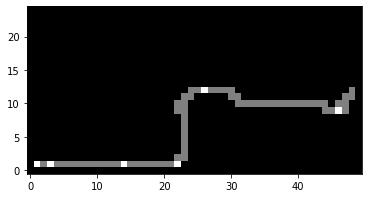

0.0 3.0


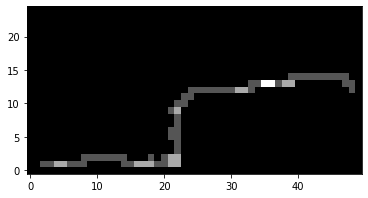

0.0 3.0


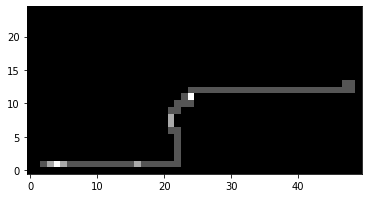

0.0 2.0


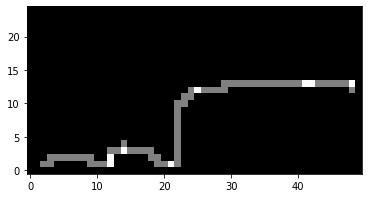

0.0 2.0


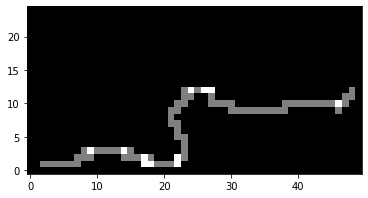

0.0 3.0


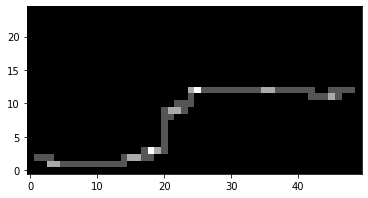

0.0 3.0


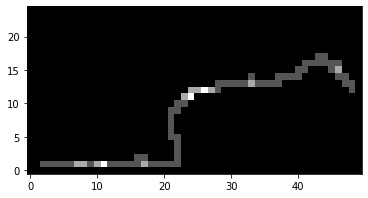

0.0 5.0


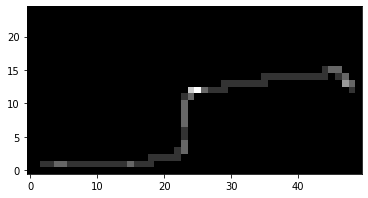

0.0 3.0


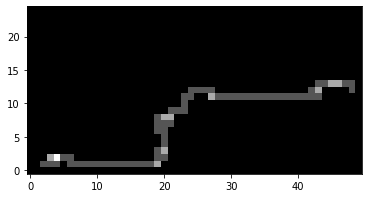

0.0 3.0


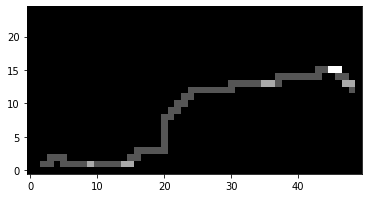

0.0 3.0


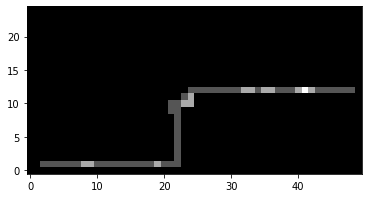

0.0 3.0


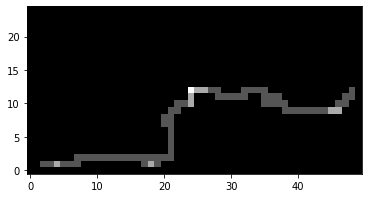

0.0 4.0


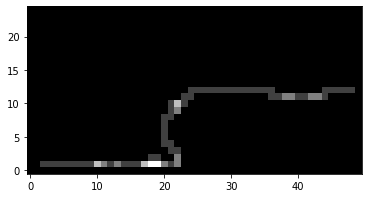

0.0 3.0


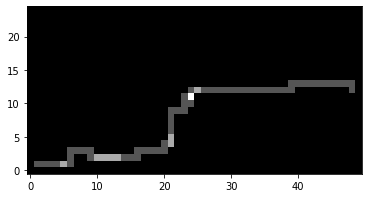

0.0 4.0


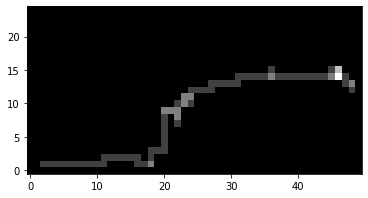

0.0 5.0


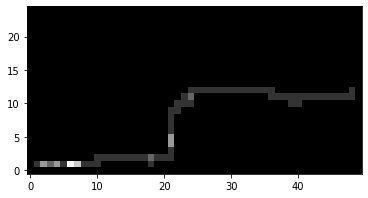

0.0 2.0


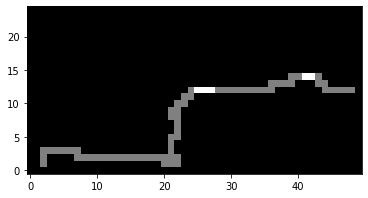

0.0 3.0


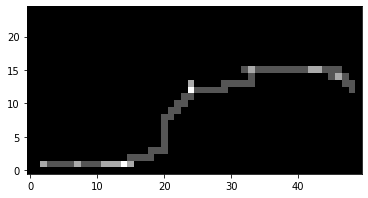

0.0 4.0


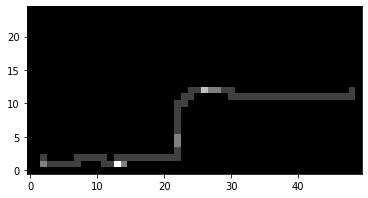

0.0 4.0


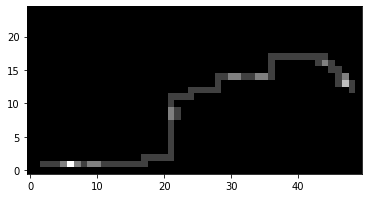

0.0 4.0


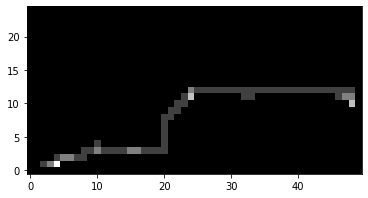

0.0 3.0


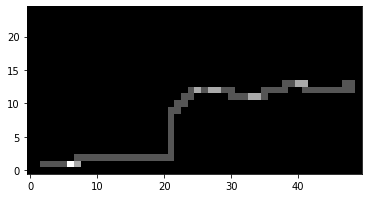

0.0 4.0


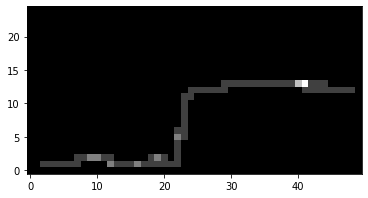

0.0 4.0


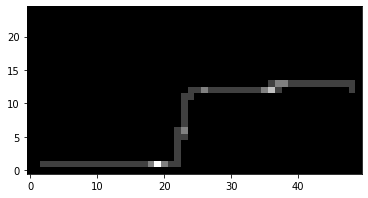

0.0 3.0


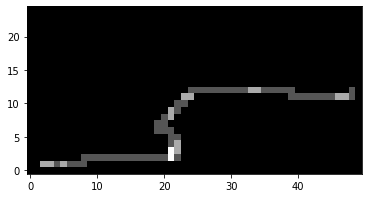

0.0 3.0


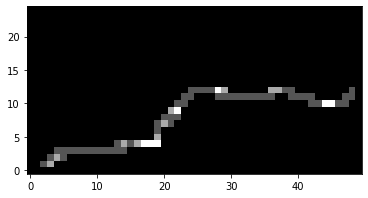

0.0 2.0


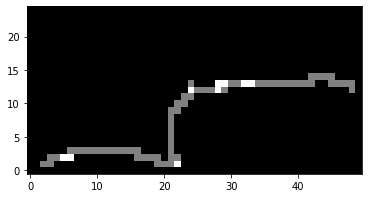

0.0 3.0


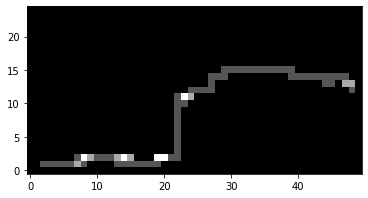

0.0 3.0


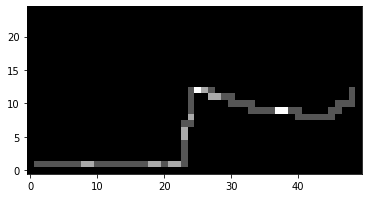

0.0 4.0


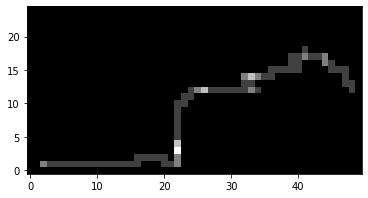

0.0 4.0


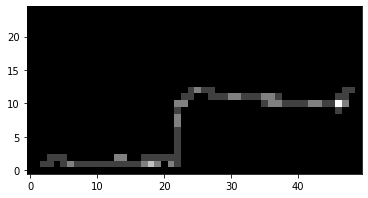

0.0 3.0


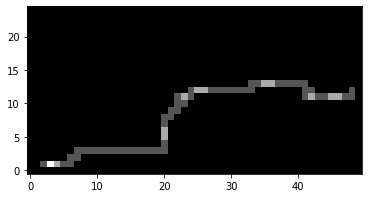

0.0 2.0


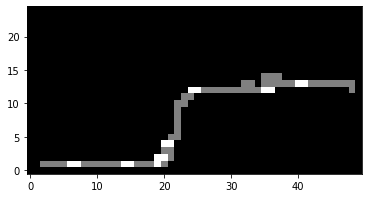

0.0 3.0


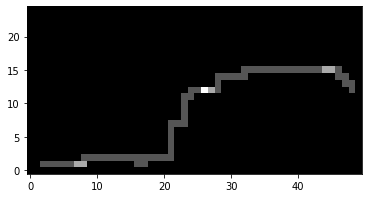

0.0 2.0


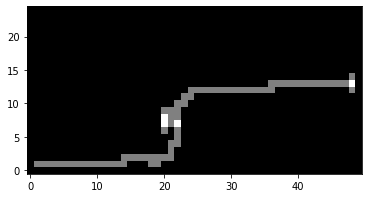

0.0 3.0


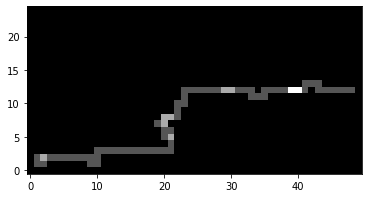

0.0 3.0


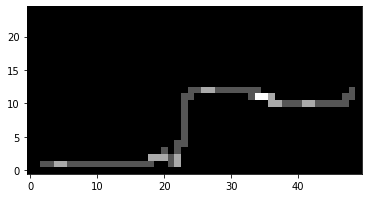

0.0 4.0


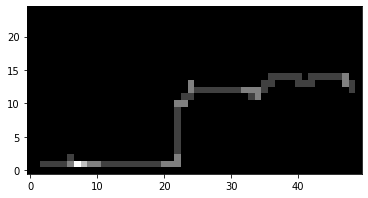

0.0 2.0


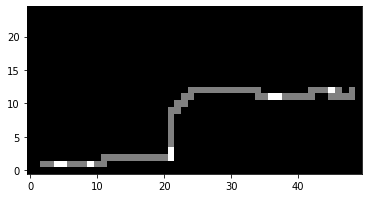

0.0 3.0


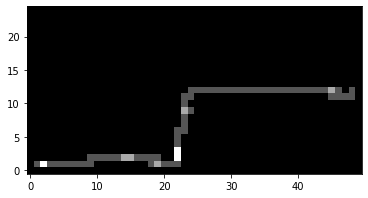

0.0 3.0


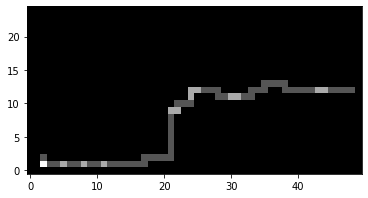

0.0 3.0


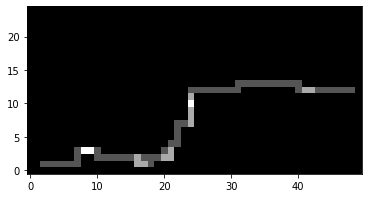

0.0 3.0


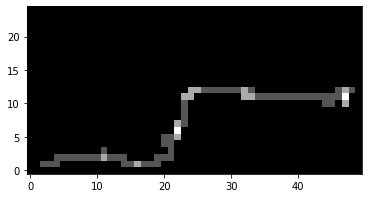

0.0 3.0


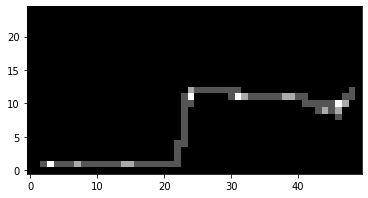

0.0 3.0


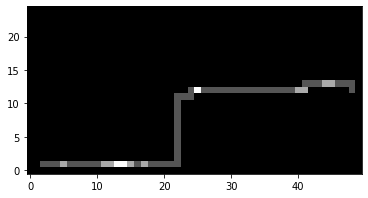

0.0 3.0


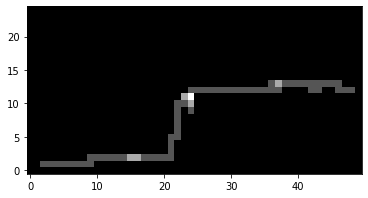

0.0 3.0


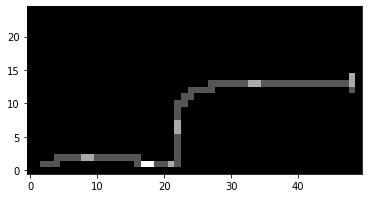

0.0 4.0


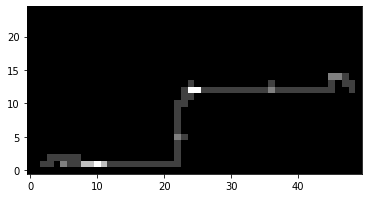

0.0 3.0


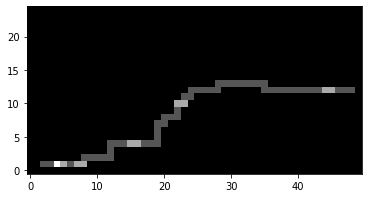

0.0 3.0


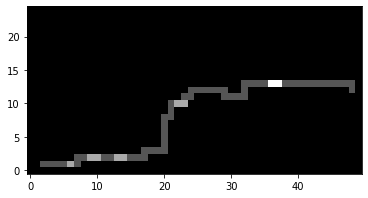

0.0 2.0


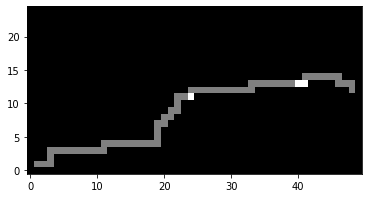

0.0 3.0


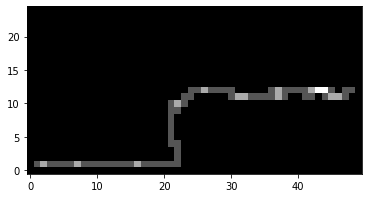

0.0 3.0


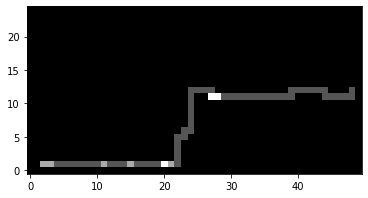

0.0 1.0


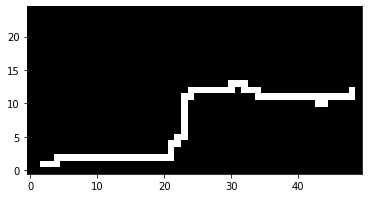

0.0 2.0


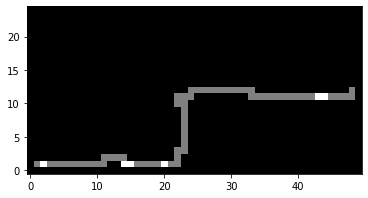

0.0 4.0


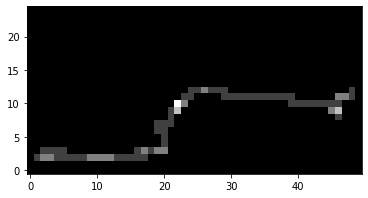

0.0 2.0


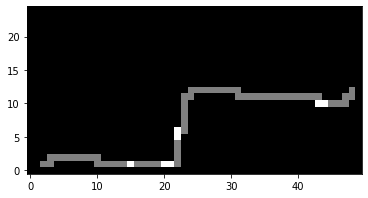

0.0 3.0


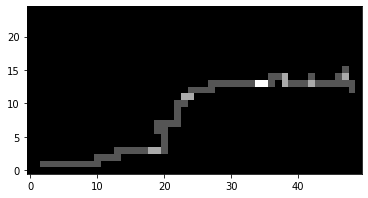

0.0 3.0


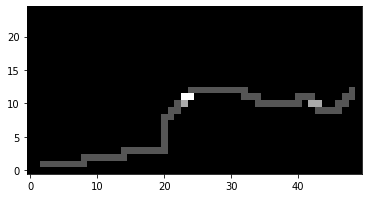

0.0 3.0


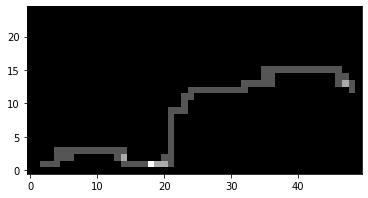

0.0 3.0


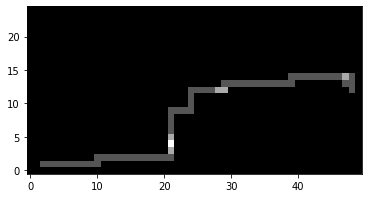

0.0 3.0


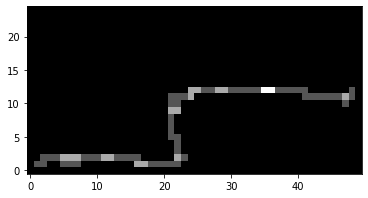

0.0 3.0


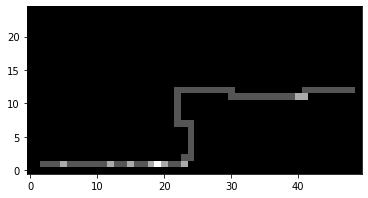

0.0 3.0


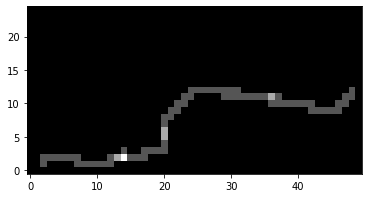

0.0 3.0


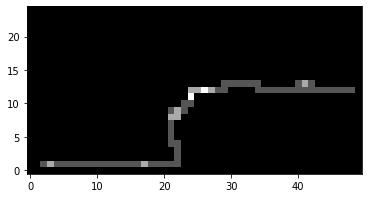

0.0 4.0


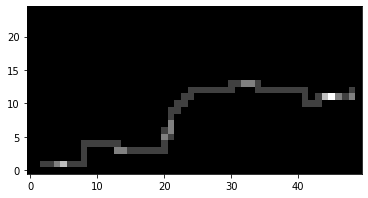

0.0 3.0


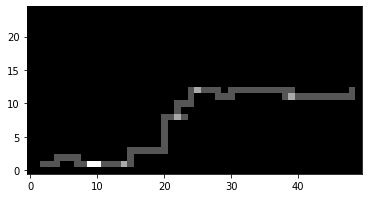

0.0 3.0


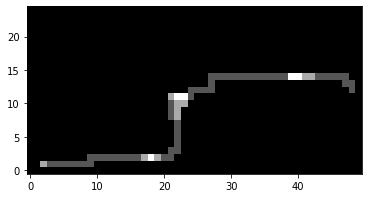

0.0 2.0


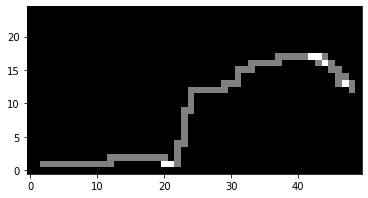

0.0 3.0


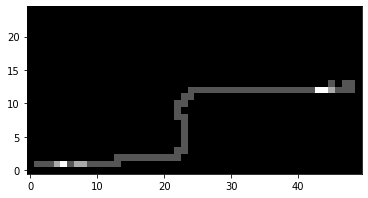

0.0 2.0


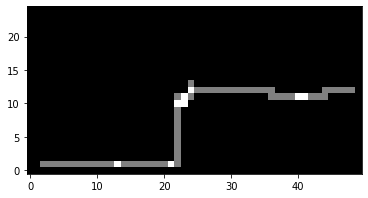

0.0 3.0


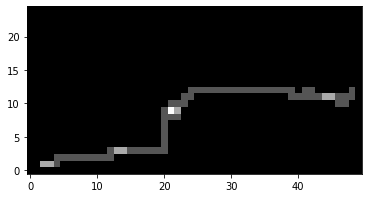

0.0 3.0


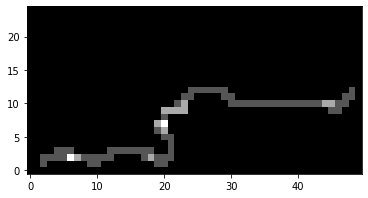

0.0 3.0


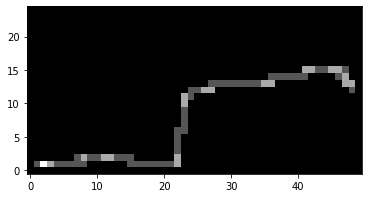

0.0 2.0


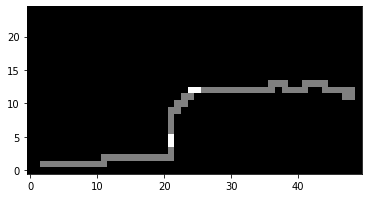

0.0 2.0


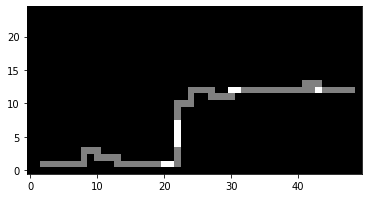

0.0 3.0


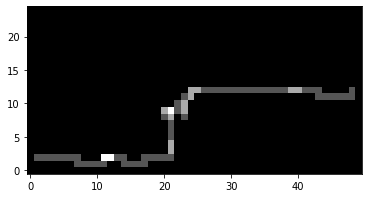

0.0 4.0


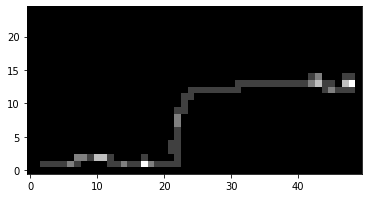

0.0 3.0


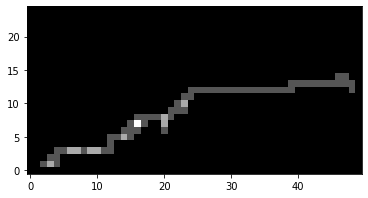

0.0 4.0


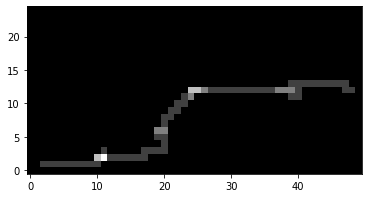

0.0 3.0


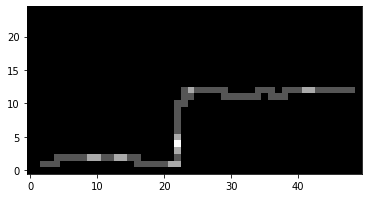

0.0 2.0


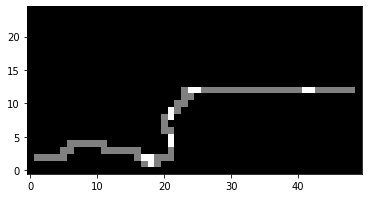

0.0 2.0


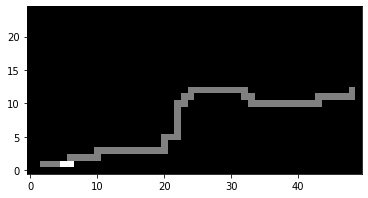

0.0 2.0


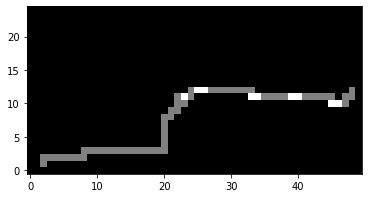

0.0 3.0


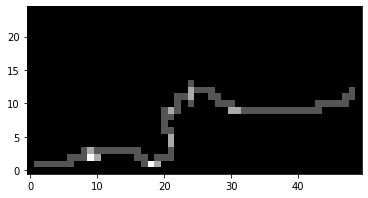

0.0 2.0


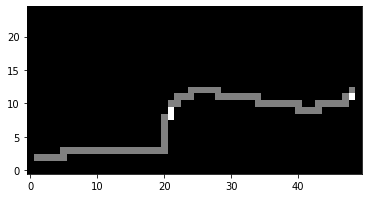

0.0 4.0


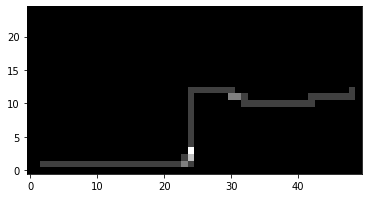

0.0 3.0


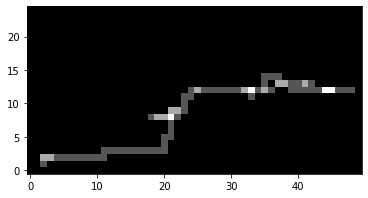

0.0 2.0


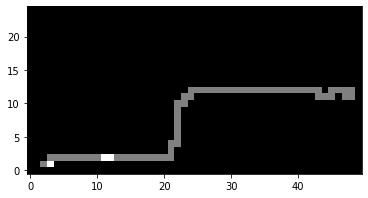

0.0 5.0


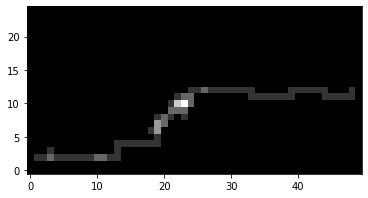

0.0 4.0


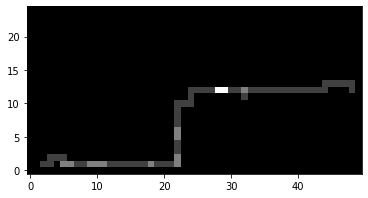

0.0 4.0


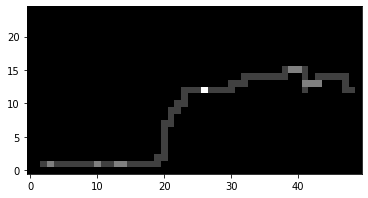

0.0 2.0


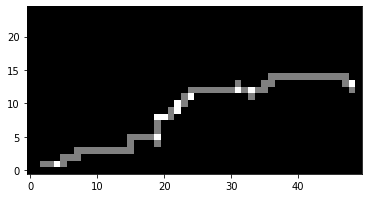

0.0 2.0


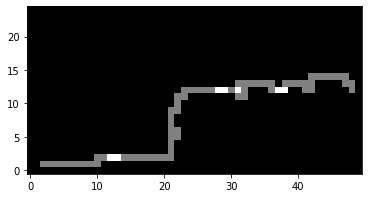

0.0 4.0


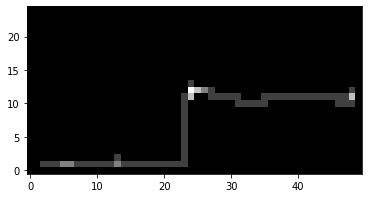

0.0 3.0


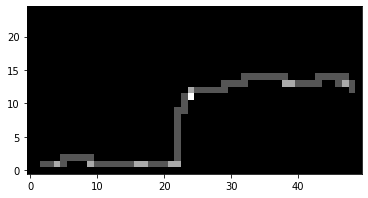

0.0 3.0


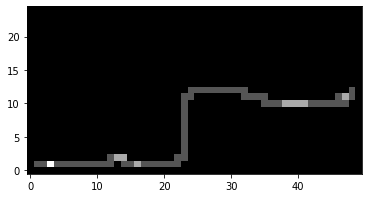

0.0 3.0


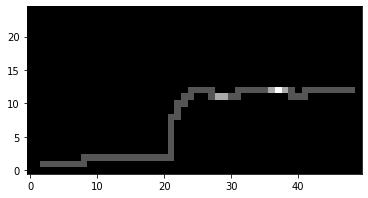

0.0 3.0


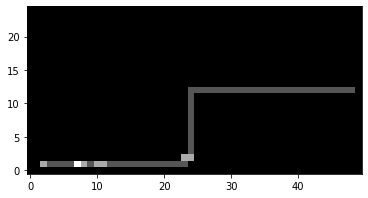

0.0 3.0


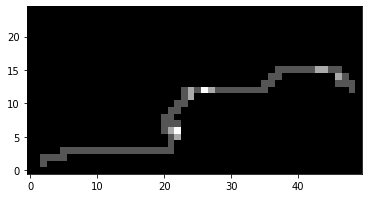

0.0 2.0


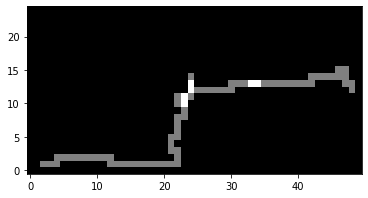

0.0 3.0


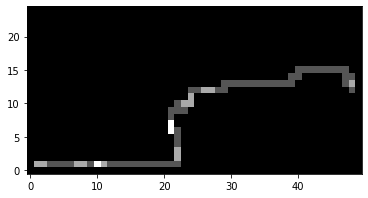

0.0 3.0


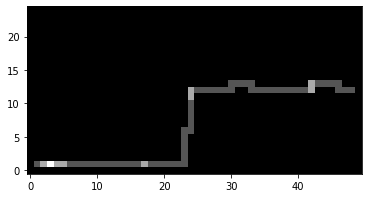

In [65]:
policy = np.zeros((50, 25))
#policy = policiesNew[:][:][policiesNew.shape[2] - 1].copy()
for i in range(0, 50):
    for j in range(0, 25):
        policy[i][j] = policiesNew[i][j][661]

for episode in range(0, 200):
    count = np.zeros((50, 25))
    currStateX = 1
    currStateY = 1

    for step in range(0, 1000):
            newState = move((currStateX, currStateY), policy[currStateX][currStateY])
            count[newState[0]][newState[1]] += 1
            currStateX = newState[0]
            currStateY = newState[1]
            if(currStateX == 48 and currStateY == 12): break

    mat1 = np.zeros((25, 50))

    for i in range(0, 50):
        for j in range(0, 25):
            mat1[j][i] = count[i][j]

    plot(mat1, None, (48, 12), False)

## Part d - Policy convergence

converged at step 3 max change 0.007750340740756201
step is 1 state is 1 1 curr 2.0 last 2.0
step is 1 state is 1 2 curr 3.0 last 2.0
step is 2 state is 1 1 curr 2.0 last 2.0
step is 2 state is 1 2 curr 3.0 last 3.0
step is 2 state is 1 3 curr 3.0 last 3.0
step is 2 state is 1 4 curr 3.0 last 3.0
step is 2 state is 1 5 curr 3.0 last 3.0
step is 2 state is 1 6 curr 3.0 last 3.0
step is 2 state is 1 7 curr 3.0 last 3.0
step is 2 state is 1 8 curr 3.0 last 3.0
step is 2 state is 1 9 curr 3.0 last 3.0
step is 2 state is 1 10 curr 3.0 last 3.0
step is 2 state is 1 11 curr 3.0 last 3.0
step is 2 state is 1 12 curr 3.0 last 3.0
step is 2 state is 1 13 curr 3.0 last 3.0
step is 2 state is 1 14 curr 3.0 last 3.0
step is 2 state is 1 15 curr 3.0 last 3.0
step is 2 state is 1 16 curr 3.0 last 3.0
step is 2 state is 1 17 curr 3.0 last 3.0
step is 2 state is 1 18 curr 3.0 last 3.0
step is 2 state is 1 19 curr 3.0 last 3.0
step is 2 state is 1 20 curr 3.0 last 3.0
step is 2 state is 1 21 curr 3.0 la

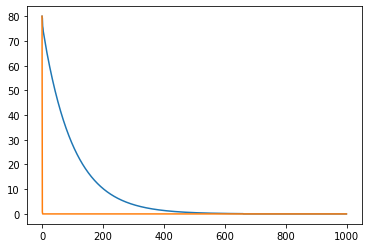

In [79]:
stopNew = 0
stopD = 0

iter = 1000 #max iterations if not converging
valuesD = np.zeros((50, 25, iter + 1))
policiesD = np.zeros((50, 25, iter))
maxNormD = np.zeros((iter))

valuesD, policiesD = valueIteration(0.01, 0.1, (48, 12), valuesD, policiesD, maxNormD, True)

for step in range(1, policiesD.shape[2]):
    
    flag = False

    for i in range(0, 50):
        for j in range(0, 25):
            if(not isValid(i, j)): continue
            if(policiesD[i][j][step] != policiesD[i][j][step - 1]):
                flag = True
                break
        
        if(flag): break
    if(not flag): 
        stopD = step
        break

for step in range(1, policiesNew.shape[2]):
    
    flag = False
    for i in range(0, 50):
        for j in range(0, 25):
            if(not isValid(i, j)): continue
            print('step is', step, 'state is', i, j, 'curr', policiesNew[i][j][step], 'last', policiesNew[i][j][step - 1])
            if(policiesNew[i][j][step] != policiesNew[i][j][step - 1]):
                flag = True
                break
        if(flag): break

    if(not flag): 
        stopNew = step
        break
print('stopNew', stopNew, 'stopD', stopD)
plt.plot(maxNormNew)
plt.plot(maxNormD)